In [113]:
from google.colab import drive
drive.mount("/content/gdrive")
!pip install geopandas
!pip install geojson

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [114]:
import geopandas as gpd
import geojson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import pandas as pd

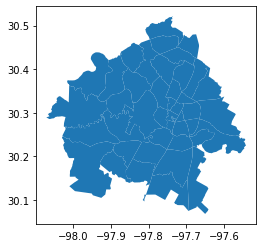

In [115]:
data = gpd.read_file("/content/gdrive/MyDrive/unmazer.ai/neighbourhoods.geojson")
data.head()
data.plot()

In [116]:
listing = pd.read_csv("/content/gdrive/MyDrive/unmazer.ai/listings.csv")
listing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,48107269,Residences at the Domain,368944610,Kia,NaN,78758,30.40051,-97.72527,Entire home/apt,185,31,0,NaN,NaN,40,304
10268,48107277,Residences at the Domain,368944610,Kia,NaN,78758,30.40051,-97.72527,Entire home/apt,153,31,0,NaN,NaN,40,331
10269,48109299,Relax in comfort | 1BR in Austin,359036978,Kia,NaN,78729,30.45118,-97.77480,Entire home/apt,82,30,0,NaN,NaN,358,360
10270,48109324,A place of your own | 1BR in Austin,359036978,Kia,NaN,78701,30.26519,-97.74229,Entire home/apt,153,30,0,NaN,NaN,358,324


In [117]:
# Top neighbourhoods with maximun number of listings
sorted_listing = listing.groupby(['neighbourhood', 'latitude', 'longitude'],)['neighbourhood'].count().reset_index(name='count')
sorted_listing = sorted_listing.groupby(['neighbourhood']).agg({'count' : 'sum', 'latitude' : 'mean', 'longitude' : 'mean'}).sort_values(['count'], ascending=False)
sorted_listing

,count,latitude,longitude
neighbourhood,,,
78704,1822,30.246580,-97.761535
78702,1263,30.264553,-97.720201
78701,713,30.269849,-97.744774
78741,622,30.233227,-97.723014
78703,530,30.283370,-97.761764
78745,513,30.210219,-97.791151
78705,505,30.291488,-97.741850
78751,478,30.310527,-97.723995
78723,313,30.303653,-97.690541


In [118]:
# Top Hosts wrt number of listings
top_host = listing.groupby(['host_name']).agg({'calculated_host_listings_count' : 'mean'}).sort_values(['calculated_host_listings_count'], ascending=False)
top_host[:10]

,calculated_host_listings_count
host_name,
Kia,326.040201
WanderJaunt,131.000000
Martin,66.762376
TurnKey Vacation Rentals,58.177419
Renters Club,56.000000
Madalynn,48.000000
Above,43.000000
Christian,41.408163
Evolve Vacation Rental,38.000000


In [119]:
# Neighbourhoods mapped to their corresponding polygons
gdf_listings = gpd.GeoDataFrame(sorted_listing, geometry=gpd.points_from_xy(sorted_listing.longitude, sorted_listing.latitude))
gdf_listings

,count,latitude,longitude,geometry
neighbourhood,,,,
78704,1822,30.246580,-97.761535,POINT (-97.76153 30.24658)
78702,1263,30.264553,-97.720201,POINT (-97.72020 30.26455)
78701,713,30.269849,-97.744774,POINT (-97.74477 30.26985)
78741,622,30.233227,-97.723014,POINT (-97.72301 30.23323)
78703,530,30.283370,-97.761764,POINT (-97.76176 30.28337)
78745,513,30.210219,-97.791151,POINT (-97.79115 30.21022)
78705,505,30.291488,-97.741850,POINT (-97.74185 30.29149)
78751,478,30.310527,-97.723995,POINT (-97.72400 30.31053)
78723,313,30.303653,-97.690541,POINT (-97.69054 30.30365)


In [120]:
#mapping complete
data['neighbourhood']=data['neighbourhood'].astype(int)
gdf=data.merge(listing,on="neighbourhood")
gdf

,neighbourhood,neighbourhood_group_x,geometry,id,name,host_id,host_name,neighbourhood_group_y,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",385602,SXSW!! - Accommodations,1929911,Ernest,NaN,30.16976,-97.86306,Entire home/apt,1200,3,0,NaN,NaN,1,0
1,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",2989616,!South Austin Private room2,7567467,Chalu,NaN,30.18864,-97.88932,Private room,35,30,34,2020-08-19,0.51,4,233
2,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",4289075,2 Cozy Bedrooms- 25 min. from Race.,22268233,Brandon,NaN,30.14190,-97.85239,Entire home/apt,400,1,0,NaN,NaN,1,0
3,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",5417341,AUSTIN OASIS w/Pool & Hot tub,28082332,Karen,NaN,30.18823,-97.86984,Entire home/apt,253,3,88,2020-12-30,1.41,1,164
4,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",5524631,Single Family Home with Pool,28649640,Natalie,NaN,30.18654,-97.89452,Entire home/apt,1099,1,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48025543,Chic 2 BR Accommodations in The Heart of Austin,79259184,Rick,NaN,30.27164,-97.74757,Entire home/apt,144,2,0,NaN,NaN,2,33
10268,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48028719,2BR Presidential Suite In Gorgeous Austin TX,371942068,Joy,NaN,30.27261,-97.74859,Entire home/apt,349,2,0,NaN,NaN,4,364
10269,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48057584,A place of your own | 1BR in Austin,359036978,Kia,NaN,30.26519,-97.74229,Entire home/apt,133,30,0,NaN,NaN,358,299
10270,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48058992,Enjoy like a local in the heart of Rainey st,387405041,Alex,NaN,30.26048,-97.73664,Entire home/apt,95,1,0,NaN,NaN,2,33


In [121]:
# figure drawing
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(gdf['room_type'])
gdf['room'] = enc.transform(gdf['room_type'])
gdf

,neighbourhood,neighbourhood_group_x,geometry,id,name,host_id,host_name,neighbourhood_group_y,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",385602,SXSW!! - Accommodations,1929911,Ernest,NaN,30.16976,-97.86306,Entire home/apt,1200,3,0,NaN,NaN,1,0,0
1,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",2989616,!South Austin Private room2,7567467,Chalu,NaN,30.18864,-97.88932,Private room,35,30,34,2020-08-19,0.51,4,233,2
2,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",4289075,2 Cozy Bedrooms- 25 min. from Race.,22268233,Brandon,NaN,30.14190,-97.85239,Entire home/apt,400,1,0,NaN,NaN,1,0,0
3,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",5417341,AUSTIN OASIS w/Pool & Hot tub,28082332,Karen,NaN,30.18823,-97.86984,Entire home/apt,253,3,88,2020-12-30,1.41,1,164,0
4,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",5524631,Single Family Home with Pool,28649640,Natalie,NaN,30.18654,-97.89452,Entire home/apt,1099,1,0,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48025543,Chic 2 BR Accommodations in The Heart of Austin,79259184,Rick,NaN,30.27164,-97.74757,Entire home/apt,144,2,0,NaN,NaN,2,33,0
10268,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48028719,2BR Presidential Suite In Gorgeous Austin TX,371942068,Joy,NaN,30.27261,-97.74859,Entire home/apt,349,2,0,NaN,NaN,4,364,0
10269,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48057584,A place of your own | 1BR in Austin,359036978,Kia,NaN,30.26519,-97.74229,Entire home/apt,133,30,0,NaN,NaN,358,299,0
10270,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48058992,Enjoy like a local in the heart of Rainey st,387405041,Alex,NaN,30.26048,-97.73664,Entire home/apt,95,1,0,NaN,NaN,2,33,0


In [122]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
divider = gdf["room"]==0
gdf_full = gdf[divider]
gdf_single = gdf[~divider]
geometry_full = [Point(xy) for xy in zip(gdf_full['longitude'], gdf_full['latitude'])]
geometry_single = [Point(xy) for xy in zip(gdf_single['longitude'], gdf_single['latitude'])]
frame1 = GeoDataFrame(gdf_single, geometry=geometry_single)
frame2 = GeoDataFrame(gdf_full, geometry=geometry_full)

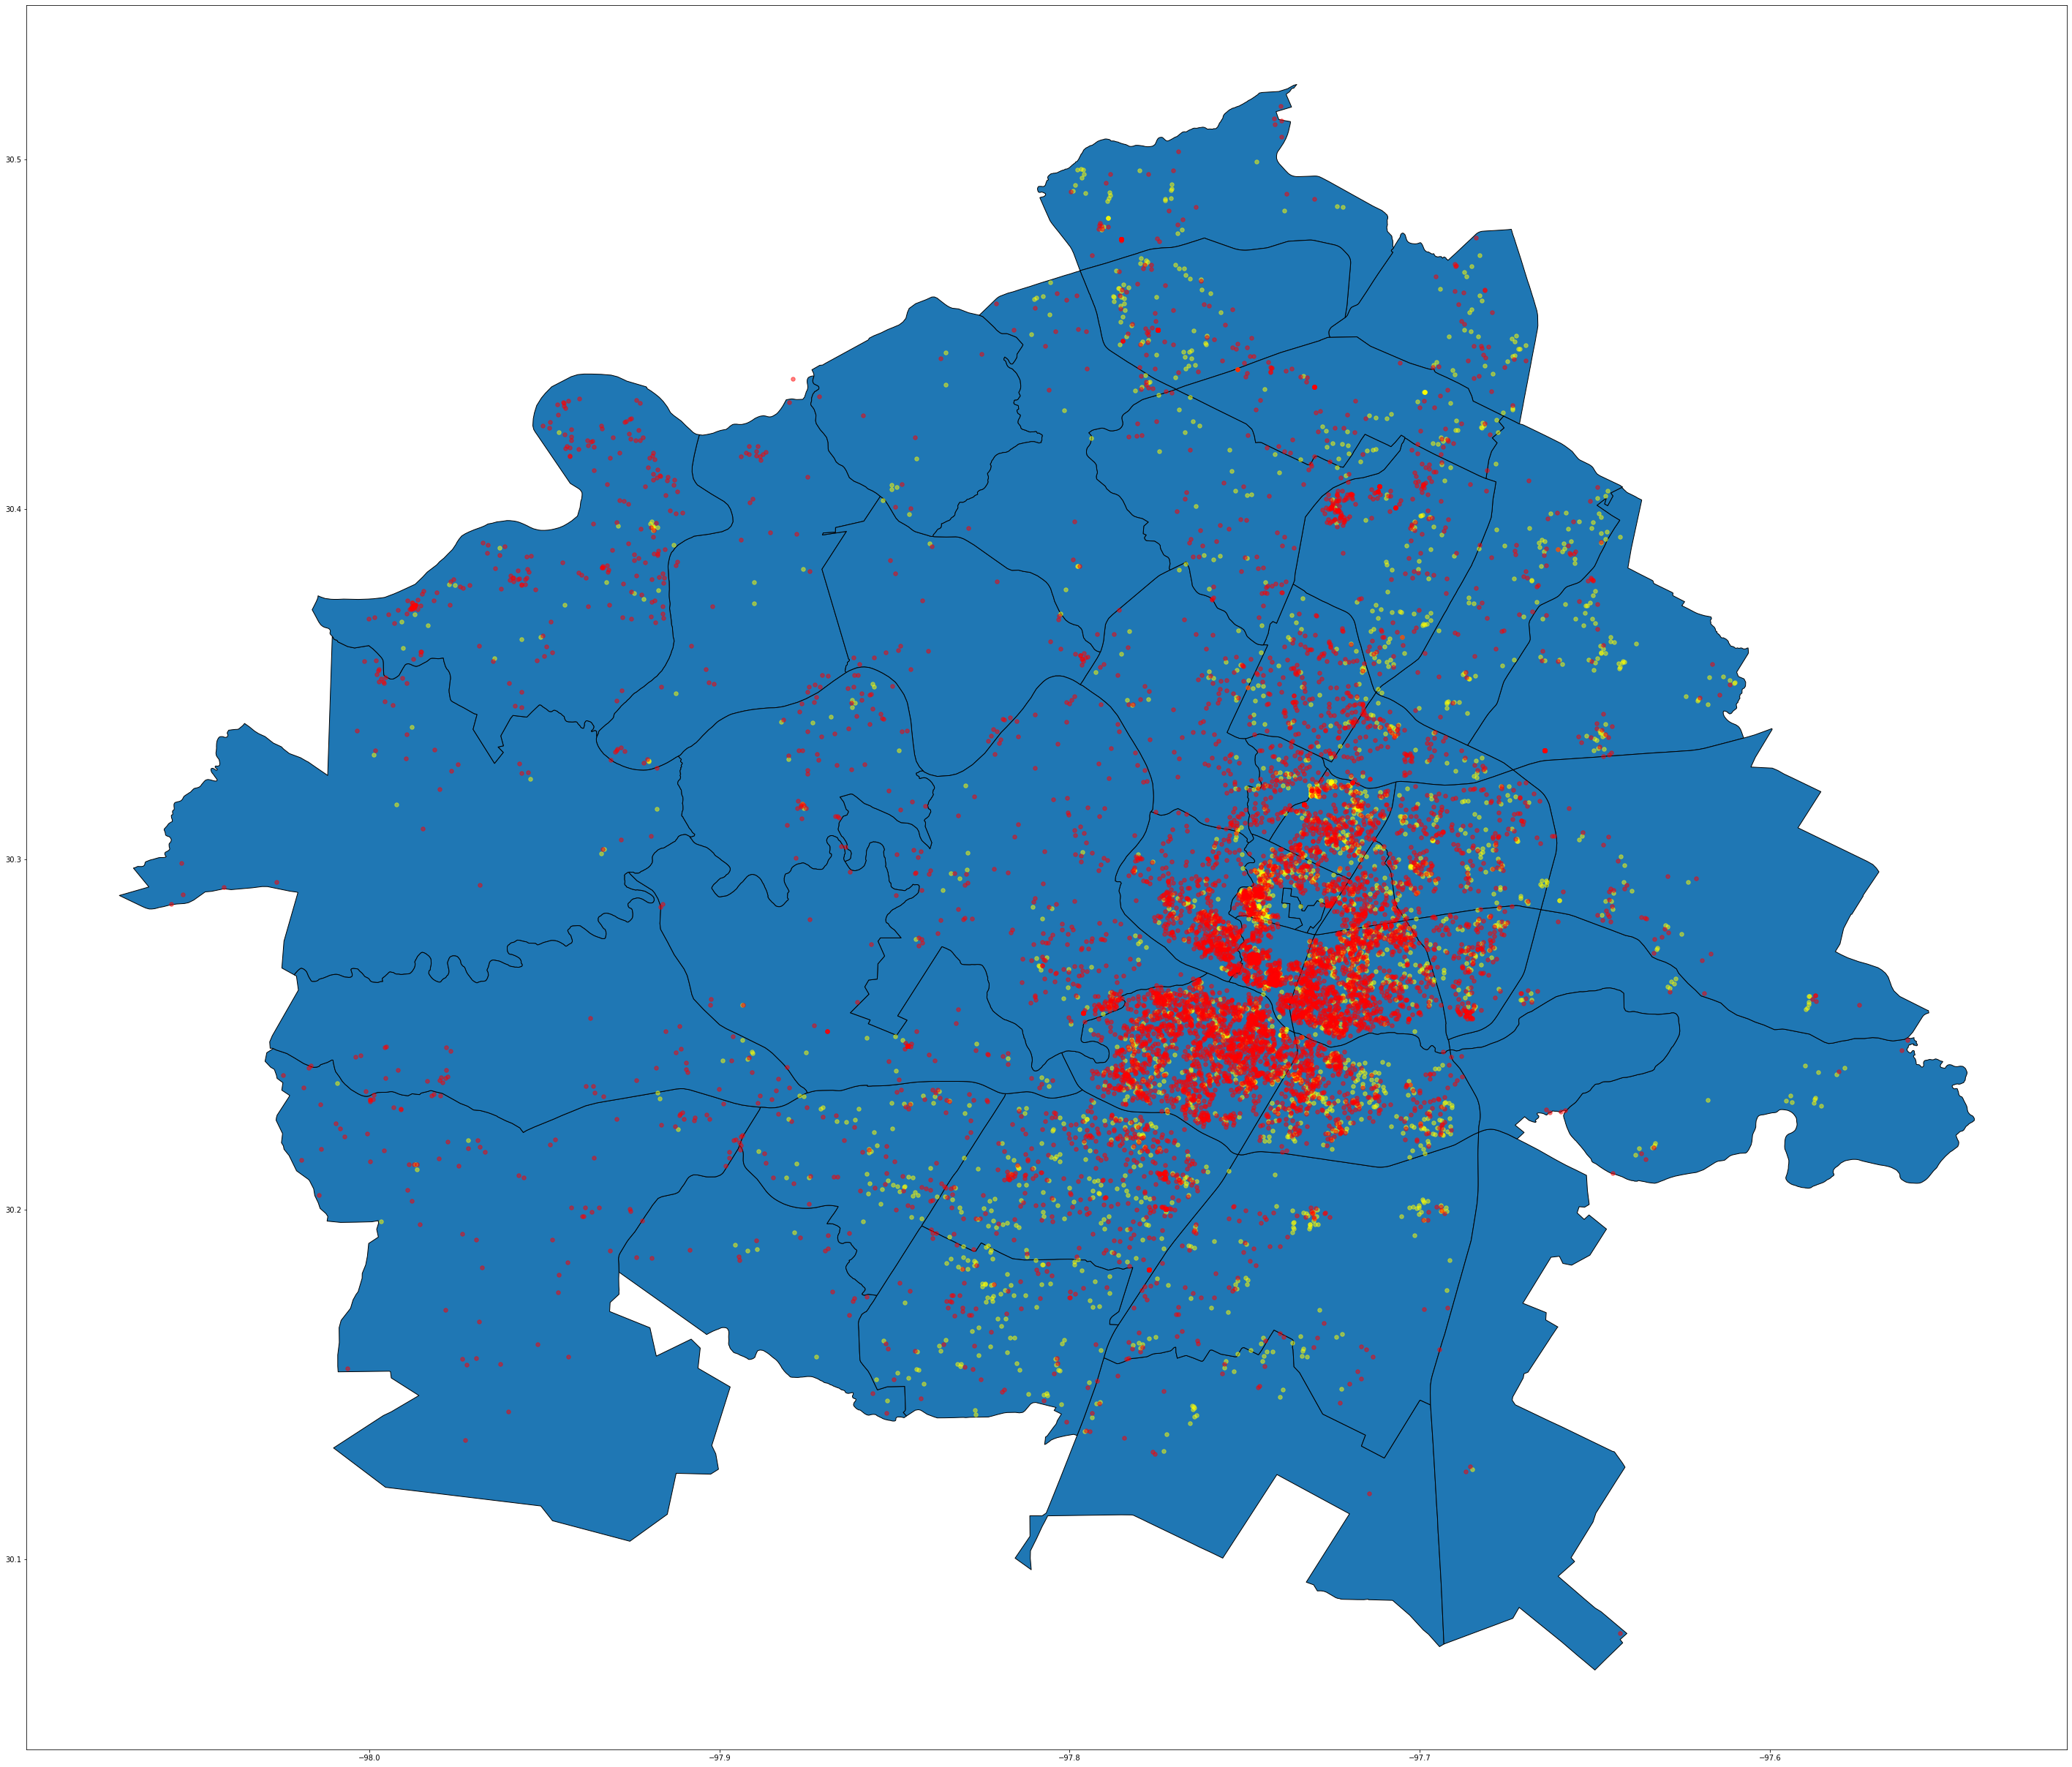

In [123]:
ax = data.plot(figsize=(50, 50), edgecolor='black')
frame1.plot(ax=ax, color='yellow', markersize=30, alpha=0.5) # For Private Room
frame2.plot(ax=ax, color='red', markersize=30, alpha=0.5) # For Full House / Apartment